# ADRC Extended State Observer Equations

Active Disturbance Rejection Control relies on the use of a Extended State Observer(ESO). This provides equations for a descrete time implementation of a ESO with a single extended state. This provides the equations using ZOH.

This implementation is baised on:
  * Herbst, G. A Simulative Study on Active Disturbance Rejection Control (ADRC) as a Control Tool for Practitioners. In Electronics, 2: 2013; pp. 246-279.
  * Miklosovic, R.; Radke, A.; Gao, Z. Discrete Implementation and Generalization of the Extended State Observer. In Proceedings of the 2006 American Control Conference, Minneapolis,Minnesota, USA, 14–16 June 2006; pp. 2209–2214.

In [150]:
from __future__ import division
from IPython.display import display
import math
from sympy import *
from sympy.interactive import printing

## Settings:

In [151]:
# Uncomment below for LaTeX printing
latex_install_location = "C://Users//tfox//AppData//Local//Programs//MiKTeX 2.9//miktex//bin//"
printing.init_printing(use_latex='png')

# Input the order of the system
system_order = 1

## Calculations:

In [152]:
# Uncomment below for LaTeX printing
import os
os.environ["PATH"] += os.pathsep + latex_install_location

In [153]:
Tsample, Zeso, b0, u_prev, yk = symbols( 'T_s Z_eso b_0 u(k-1) y(k)' )

In [154]:
# Only the equations for a single extended state have been tested
extended_states = 1
size = system_order + extended_states
A = zeros(size)
for x in range(0, size-1):
    temp = zeros(1,size)
    temp[x+1] = 1
    A[x,:] = temp
Ad_calc = eye(size)
for x in range(1,size):
    Ad_calc += A**x*(Tsample**x)/math.factorial(x)
#Ad_calc

In [155]:
B = zeros(size,1)
B[size-extended_states-1, :] = Matrix([[b0]])

temp_calc = zeros(size)
for x in range(1,size):
    temp_calc += (A**(x-1)*(Tsample**x)/math.factorial(x))
Bd_calc = temp_calc*B
#Bd_calc

In [156]:
Lc_calc = Matrix(symbols('l1:'+str(size+1)))
#Lc_calc

In [157]:
Cd_calc = zeros(size,1).T
Cd_calc[:,0] = Matrix([[1]])
#Cd_calc

In [158]:
xp = Matrix(symbols('x_prev1:'+str(size+1)))
#xp

In [159]:
xs = Matrix(symbols('x1:'+str(size+1)))
xnext = Matrix(symbols('x_prediction1:'+str(size+1)))
#xs

## The equations -

#### This is the prediction equation. Calculate this after the updating the previous control value:

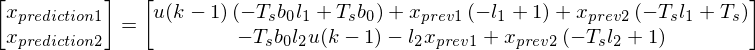

In [160]:
prediction = (Ad_calc-Lc_calc*Cd_calc*Ad_calc)*xp + (Bd_calc-Lc_calc*Cd_calc*Bd_calc)*u_prev 
Eq(xnext, prediction)

#### This is the correction equation. Add this between reading the value and updating the control:

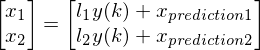

In [161]:
correction = xnext + Lc_calc*yk
Eq(xs,correction)

#### These are the L value equations. They can be calculated at compile time:

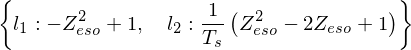

In [162]:
s = symbols('s')
ls = solve( (s*eye(size) - (Ad_calc - Ad_calc*Lc_calc*Cd_calc)).det() - (s - Zeso)**size , Lc_calc )
#for key in ls.keys():
    #ls[key] = factor(ls.get(key))
ls